# W5 XAI Assignment - Explainable Techniques


- Inception(GoogLeNet):
  - Combines different filter sizes (1x1, 3x3, 5x5) and max-pooling, all in parallel. This allows the network to capture both fine and coarse details.
  -  The model uses 1x1 convolutions to reduce the number of computations, making it more efficient while still being powerful.
  - With 22 layers, the Inception model is deep but still computationally manageable due to its efficient structure.

In [58]:
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 scikit-learn==1.2.2 lime==0.2.0.1 anchor-exp==0.0.2.0

In [59]:
import tensorflow as tf
from skimage import io
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from skimage.segmentation import mark_boundaries
from skimage.segmentation import felzenszwalb
from skimage.color import gray2rgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications.inception_v3 import decode_predictions


# XAI
from lime import lime_image

#### 1. Loading & Preprocessing Image

In [60]:
# Load the image
img_path = ('/content/Dalgom.jpg')
# Resize to 299 X 299 pixels
img = image.load_img(img_path, target_size=(299,299))
# Convert image to numpy
img_array = image.img_to_array(img)
# Expand to a 4D tensor with a batch dimension
img_array = tf.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

 Preprocess the image and adds an extra dimension to make it compatible with models that expect batched inputs.

#### 2. Load Inception Model

In [61]:
base_model = InceptionV3(weights='imagenet')

inc_model = Model(inputs=base_model.input, outputs = base_model.output)

#### 3. Prediction & Generating LIME Explanation

In [62]:
pred = inc_model.predict(img_array)
decoded_predictions = decode_predictions(pred)[0]
print("Predictions: ")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predictions: 
1: Pomeranian (0.94)
2: keeshond (0.00)
3: toy_poodle (0.00)
4: Chihuahua (0.00)
5: Pekinese (0.00)


- Prediction: I used the loaded model to make predictions on the preprocessed image and decode the predictions into human readable form.

- Generate LIME explantion: LIME is used to generate local interpretable explanations for the image classification. It perturbs the input image and observes the model’s predictions to understand which parts of the image contribute most to the classification.

In [64]:
img_array_np = img_array[0].numpy()

Convert the TensorFlow tensor to a NumPy array

In [65]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array_np, inc_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

- Create a LIME explainer instance to generate explanations for image data
- Generate an explanation by perturbing the input image

#### 4. Visualization of LIME Explanation
- LIME highlights the regions of the image that heavily influenced the model’s decision.
- The mark_boundaries function helps visualize these regions.

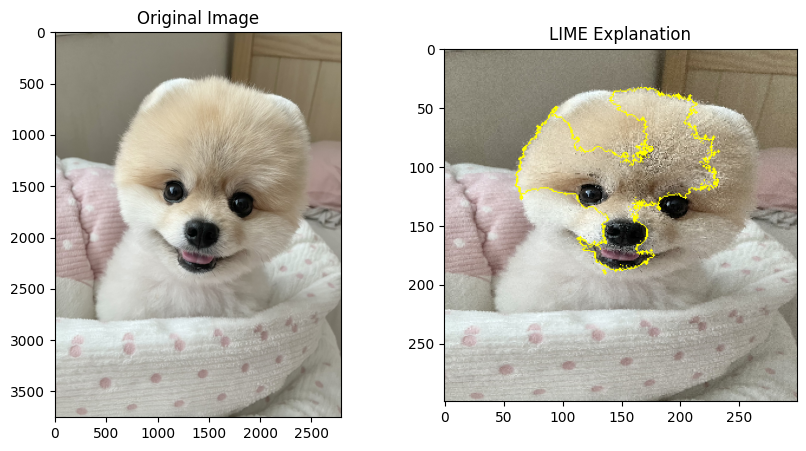

In [66]:
# Original Image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(io.imread(img_path))
plt.title("Original Image")

# LIME Explantion
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp/2+0.5, mask))
plt.title("LIME Explanation")
plt.show()


####4-1. LIME
